## Importing Libraries

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [235]:
data = pd.read_csv(r"C:\Users\LOQ\Downloads\covtype.csv.zip")
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Exploring Data

In [236]:
data.shape

(581012, 55)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [238]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [239]:
data.duplicated().sum()

0

## EDA

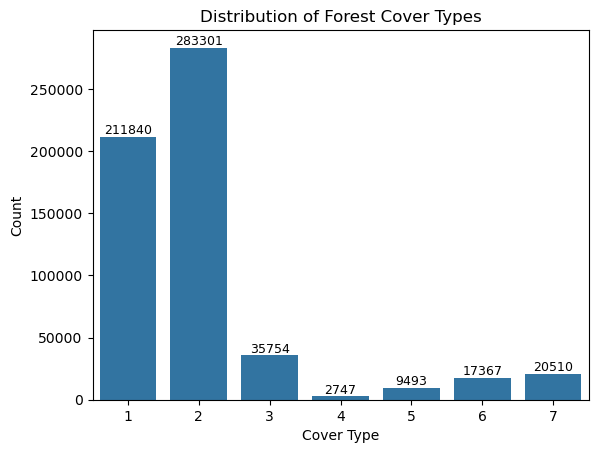

The Percentage of Cover Type 2 is: 48.76%
The Percentage of Cover Type 1 is: 36.46%
The Percentage of Cover Type 3 is: 6.15%
The Percentage of Cover Type 7 is: 3.53%
The Percentage of Cover Type 6 is: 2.99%
The Percentage of Cover Type 5 is: 1.63%
The Percentage of Cover Type 4 is: 0.47%


In [273]:
t = sns.countplot(x='Cover_Type', data=data)
for container in t.containers:
    t.bar_label(container, fontsize=9)
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

cover_counts = data['Cover_Type'].value_counts(normalize=True) * 100

for cover_type, percentage in cover_counts.items():
    print(f"The Percentage of Cover Type {cover_type} is: {percentage:.2f}%")


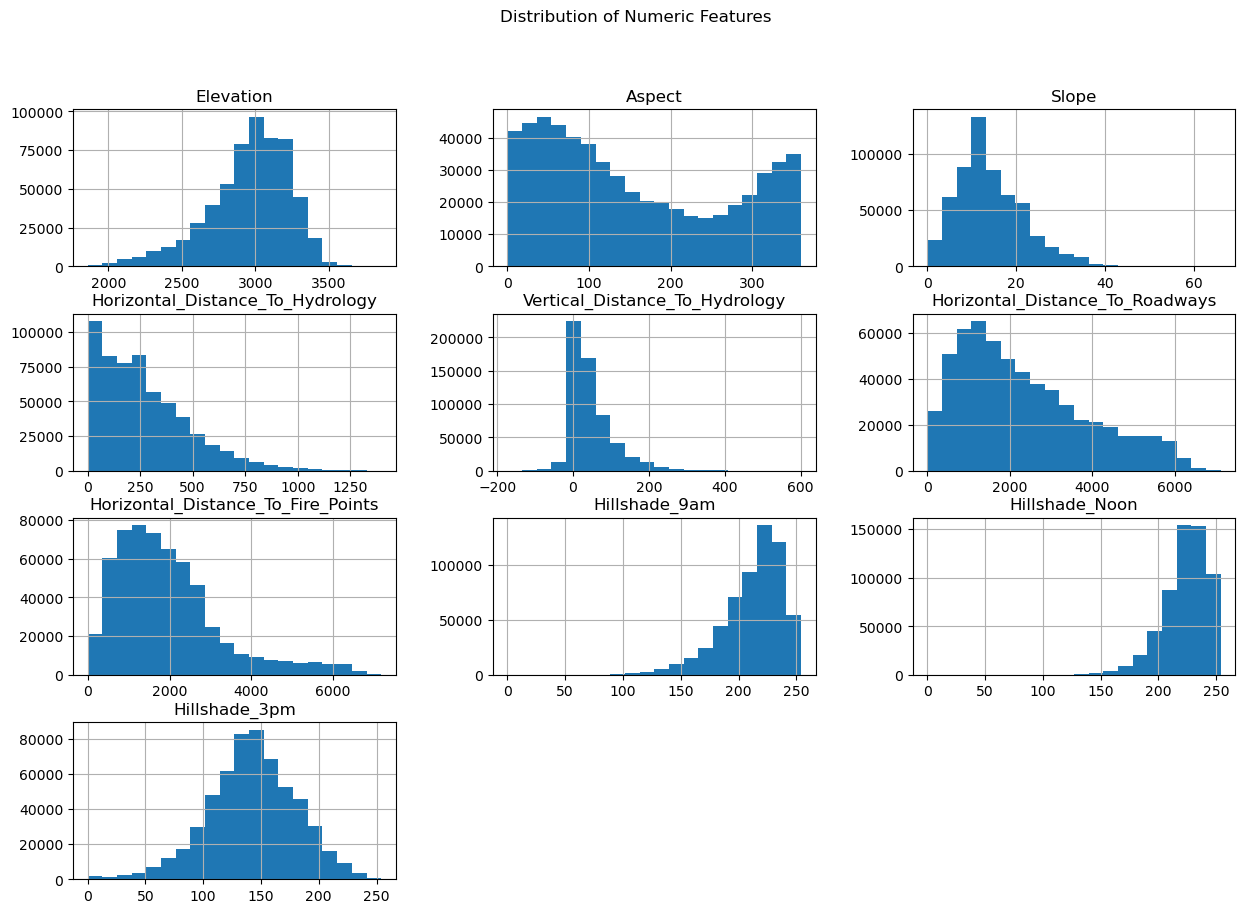

In [275]:
numeric_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'
]

data[numeric_cols].hist(figsize=(15,10), bins=20)
plt.suptitle('Distribution of Numeric Features')
plt.show()


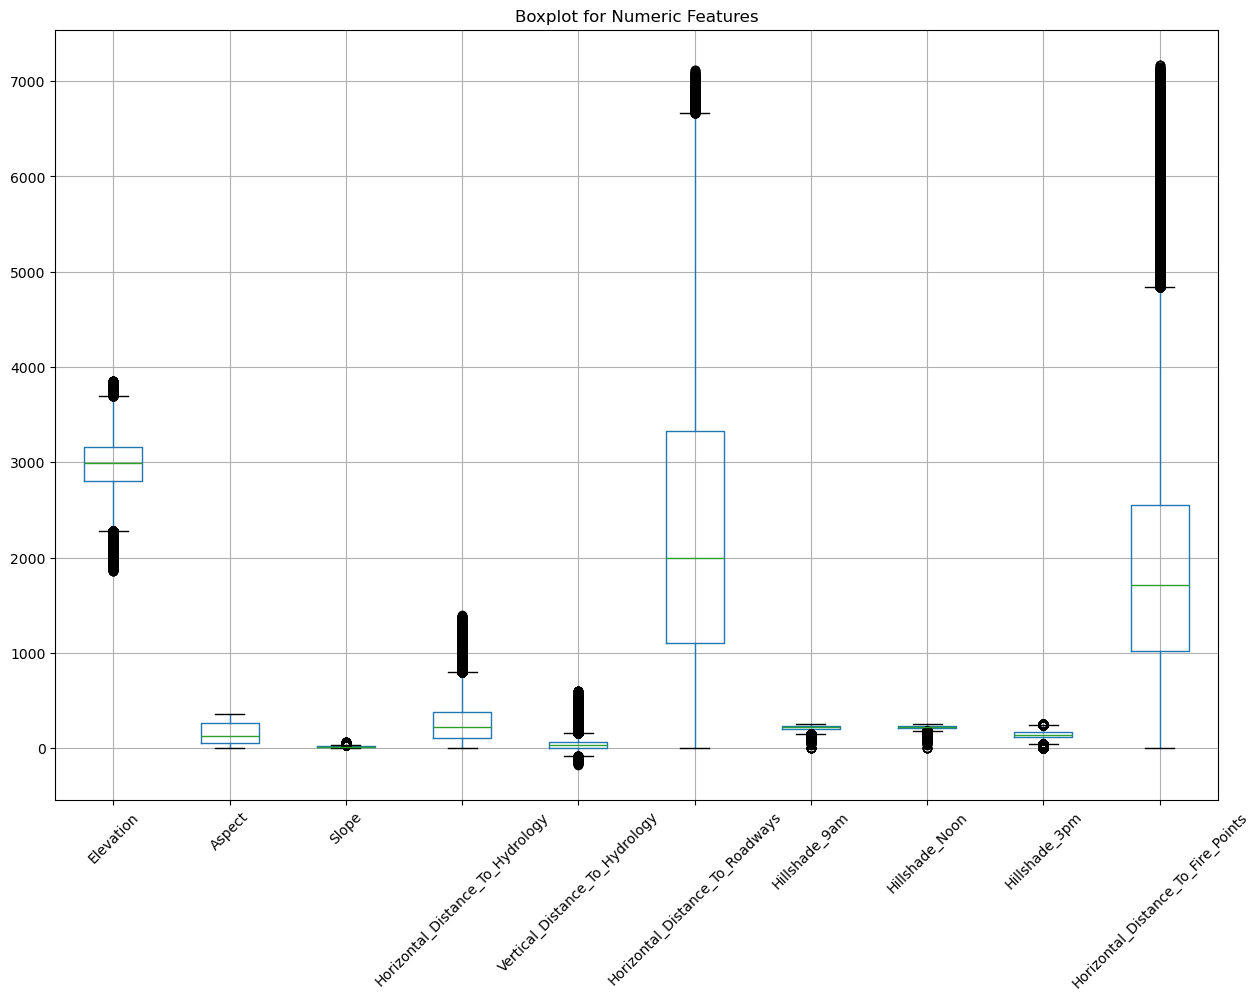

In [279]:
numeric_cols = [
    'Elevation','Aspect','Slope',
    'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways','Hillshade_9am',
    'Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points'
]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
data[numeric_cols].boxplot()
plt.title('Boxplot for Numeric Features')
plt.xticks(rotation=45)
plt.show()


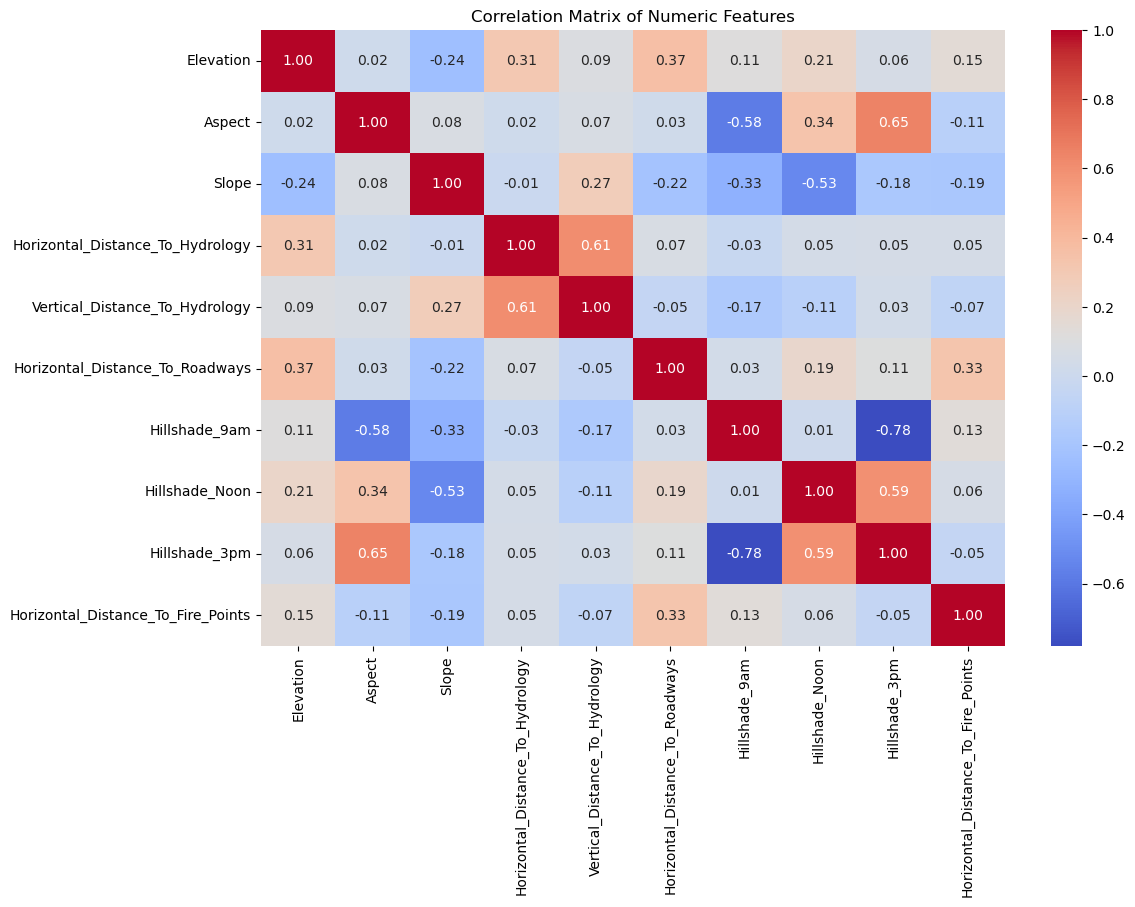

In [281]:
plt.figure(figsize=(12,8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [285]:
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers.shape[0], lower, upper

for i,col in enumerate(numeric_cols):
    n_out, low, up = detect_outliers(data, col)
    print(f"{i+1} - {col}: {n_out} outliers")


1 - Elevation: 15569 outliers
2 - Aspect: 0 outliers
3 - Slope: 15316 outliers
4 - Horizontal_Distance_To_Hydrology: 14557 outliers
5 - Vertical_Distance_To_Hydrology: 31463 outliers
6 - Horizontal_Distance_To_Roadways: 669 outliers
7 - Hillshade_9am: 17433 outliers
8 - Hillshade_Noon: 15672 outliers
9 - Hillshade_3pm: 7832 outliers
10 - Horizontal_Distance_To_Fire_Points: 31157 outliers


In [287]:
from sklearn.preprocessing import RobustScaler

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
scaler = RobustScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [289]:
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers.shape[0], lower, upper

for i,col in enumerate(numeric_cols):
    n_out, low, up = detect_outliers(data, col)
    print(f"{i+1} - {col}: {n_out} outliers")


1 - Elevation: 0 outliers
2 - Aspect: 0 outliers
3 - Slope: 0 outliers
4 - Horizontal_Distance_To_Hydrology: 0 outliers
5 - Vertical_Distance_To_Hydrology: 0 outliers
6 - Horizontal_Distance_To_Roadways: 0 outliers
7 - Hillshade_9am: 0 outliers
8 - Hillshade_Noon: 0 outliers
9 - Hillshade_3pm: 0 outliers
10 - Horizontal_Distance_To_Fire_Points: 0 outliers


## Modeling

In [291]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']


In [293]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [295]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Decision Tree Accuracy: 0.9365


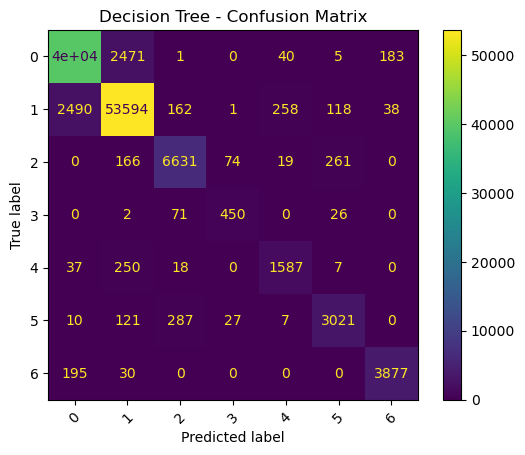

In [297]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


y_pred_dt = model_dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Random Forest Accuracy: 0.9521


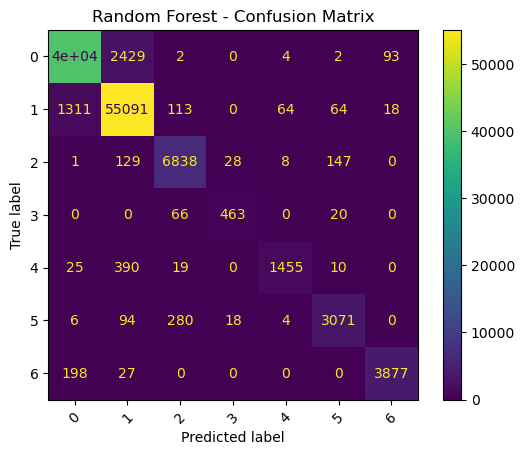

In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='viridis', xticks_rotation=45)
plt.title("Random Forest - Confusion Matrix")
plt.show()


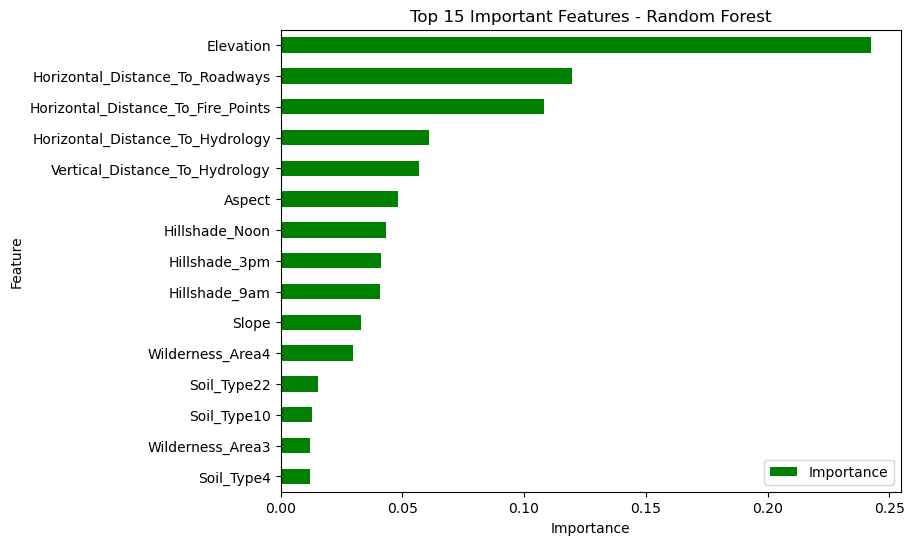

In [301]:
import pandas as pd
import numpy as np

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.head(15).plot(
    x='Feature', y='Importance', kind='barh', figsize=(8,6), color='green'
)
plt.title('Top 15 Important Features - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()
